In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Урок 7

Линейная регрессия. Однофакторный дисперсионный анализ


## Задача 1

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

    Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
    Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
    Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
    Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
    Постройте для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента.


Берем за х salary, за y scoring

In [4]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = 10

Формула линейной регрессии 
$$y = b_0 + b_1X$$

Коэффицент $b_1$ линейной регресси находяться по формуле

$$b_1=\frac{\bar{yx}-\bar{y}\cdot\bar{x}}{\bar{x^2}-(\bar{x})^2}$$ или 
$$b_1 = \frac{\sum(y_i - \bar{y})(x_i - \bar{x})}{\sum(x_i - \bar{x})^2}$$

In [5]:
x_mean = x.mean()
y_mean = y.mean()

In [6]:
def b1(x: np.array, y: np.array, x_mean: float, y_mean:float)-> float:
    top = sum([(yi - y_mean)*(xi - x_mean) for xi, yi in np.array(list(zip(x,y)))])
    bottom = sum([pow(xi - x_mean,2 ) for xi in x])
    return top/bottom

In [7]:
b_1 = b1(x, y, x_mean, y_mean)
b_1

2.620538882402765

Полчаем $$b_1 = 2.620538882402765$$

Формула для $b_0$
$$b_o = \bar{y} - b_1\bar{x}$$

Функция

In [8]:
def b0(x_mean: float, y_mean: float, b1: float) -> float :
    return y_mean - b1*x_mean

In [9]:
b_0 = b0(x_mean, y_mean, b_1)
b_0

444.1773573243596

Получаем $$b_0 = 444.1773573243596 $$

Проверка с помощью numpy

In [10]:
b = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2)
a = np.mean(y) - b * np.mean(x)
a, b

(444.1773573243596, 2.620538882402765)

Наша регрессия имеет вид
$$ y = 444.18 + 2.62x_1$$

Расчитаем коэффицент корреляции по формуле

$$r_{xy} = \frac{\sum\limits_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})} {\sqrt{\sum\limits_{i=1}^{n} (x_i - \overline{x})^2 \cdot {\sum\limits_{i=1}^{n} (y_i - \overline{y})^2}}} = b \cdot {\frac{\sigma_x}{\sigma_y}}$$

Найдем коэффициент корреляции $r$ с помощью коэффициента $b$ и средних квадратического отклонения, посчитанного для массивов $x$ и $y$:

In [11]:
r = b_1 * np.std(x) / np.std(y)
r

0.8874900920739162

#### Это означет, что 79% вариации $y$ обьясняется вариаций фактора $x$

### Найдем коэффиценты линейной регрессии методом наименьших квадратов по формуле

Формула
$$\begin{cases}
nb_0 + a_1\sum\limits_{i=1}^{n} x_i = \sum\limits_{i=1}^n y_i\\
b_0\sum\limits_{i=1}^n x_i + b_1 \sum\limits_{i=1}^n x^2_i = \sum\limits_{i=1}^n x_i y_i
\end{cases}$$

Подготовим данные для расчетов, создав датасет в pandas

In [12]:
d = {'num': np.arange(1, len(x) + 1), 
     'x': x, 
     'y': y, 
     'x_sq' :np.square(x) ,
     'y_sq' :np.square(y) ,
     'xy' : x*y
    }

In [13]:
df = pd.DataFrame(d)

In [14]:
df

,num,x,y,x_sq,y_sq,xy
0,1,35,401,1225,160801,14035
1,2,45,574,2025,329476,25830
2,3,190,874,36100,763876,166060
3,4,200,919,40000,844561,183800
4,5,40,459,1600,210681,18360
5,6,70,739,4900,546121,51730
6,7,54,653,2916,426409,35262
7,8,150,902,22500,813604,135300
8,9,120,746,14400,556516,89520
9,10,110,832,12100,692224,91520


In [15]:
d_sum = {'num': np.sum(df.num ),
        'x' : np.sum(df.x),
        'y' : np.sum(df.y),
        'x_sq': np.sum(df.x_sq) ,
        'y_sq' :np.sum(df.y_sq) ,
        'xy': np.sum(df.xy)
        }

In [16]:
df_sum = pd.DataFrame(d_sum, index=np.arange(5))

In [17]:
d_sum

{'num': 55,
 'x': 1014,
 'y': 7099,
 'x_sq': 137766,
 'y_sq': 5344269,
 'xy': 811417}

Подставим полученные данные в формулу наименьших квадратов

$$\begin{cases}
55b_0 + 1014b_1 = 7099\\
1014b_0 + 137766b_1 = 811417
\end{cases}$$

Получаем 
$$\begin{cases}
b_0 = \frac{25870666}{1091489}\\
b_1 = \frac{37429549}{6658934}
\end{cases}$$

In [18]:
b_0_ms = 25870666/1091489
b_1_ms = 37429549/6658934
b_0_ms, b_1_ms

(23.702177484152383, 5.620952092331896)

##### Где то есть ошибка, но я не вижу где 

### Найдем коэффиценты линейной регрессии методом наименьших квадратов с помощью numpy

Перепишем линейное уравнение $y = b_0 + b_1x$ как $y = Ap$ <br>
где $A = [[x 1]]$ и $p = [[b_1], [b_0]]$ 

In [19]:
A = np.vstack([x, np.ones(len(x))]).T
A

array([[ 35.,   1.],
       [ 45.,   1.],
       [190.,   1.],
       [200.,   1.],
       [ 40.,   1.],
       [ 70.,   1.],
       [ 54.,   1.],
       [150.,   1.],
       [120.,   1.],
       [110.,   1.]])

Используем lstsq для решения относительно вектора $p$

In [20]:
m,c = np.linalg.lstsq(A, y, rcond=None)[0]
m,c 

(2.620538882402765, 444.17735732435955)

## Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.

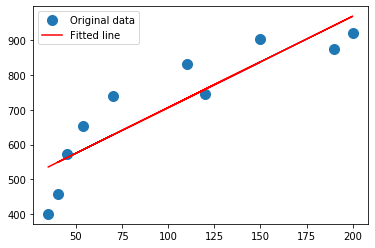

In [21]:
plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, m*x + c, 'r', label='Fitted line')
plt.legend()
plt.show()

В полученном граффике видим, что распределение имеет нелинейную структуру 

## Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.

Найдем коэффициент детерминации $R^2$:

In [22]:
R2 = r**2
R2

0.7876386635293682

С помощью этого уравнения регрессии посчитаем значения, предсказанные моделью значения цен на квартиры:


In [23]:
y_pred = c + m * x
y_pred

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

Качество модели найдем с помощью средней ошибки аппроксимации $\overline {A}$:

Формула 
$$\bar{A} = \frac{\sum|{y - \bar{y_x}}|}{n} * 100\%$$

Решение

In [24]:
A_mean = 100 * np.mean(np.abs((y - y_pred) / y))
A_mean

11.469251843561706

$\bar{A}$ незначительно больше $10\%$, что говорит о том, что модель плохо описывает данные. Что было видно из графика 

### Оцените построенное уравнение регрессии с помощью F-критерия Фишера.

Для оценки значимости уравнения регрессии воспользуемся F-критерием Фишера.

Формула фактического значение F-критерия

$$F = \frac{R^2}{1-R^2} \frac{n-k-1}{k}$$

In [25]:
F = (R2 * (10 - 2)) / (1 - R2)
F

29.671640859664432

Возьмем из таблицы значение $F_{крт}$ при $k_1 = 1$ и $k_2 = 8$

$$F_{крт} = 5.32$$

Так как $F_{факт} = 29.67 > F_{кр} = 5.32 $, уравнение регрессии статистически значимо.

## Постройте для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента.

Для оценки статистической значимости параметров регрессии воспользуемся $t$-статистикой Стьюдента и также рассчитаем доверительные интервалы каждого из показателей. При $df = n - 2 = 10 - 2 = 8$ и $\alpha = 0.05$ получим


$$t_{кр} = 2,306$$

Определим стандартную ошибку $S_{ост}$ (переменная **s_residual**) и случайные ошибки $m_a, \; m_b$:

Формула стандартной ошибки
$$S_{ост} = \sqrt{\frac{\sum\limits_{i=1}^{n}(y_i - \hat{y}_i)^2}{n - 2}}$$

In [26]:
s_residual = np.sqrt(np.sum((y - y_pred)**2) / (n - 2))
s_residual

89.93340731602926

Cлучайные ошибки $m_a$, $m_b$ находятся по формулам:

$$m_a  = S_{ост} \cdot {\frac{\sqrt{\sum{x^2}}}{n \cdot {\sigma_x}}}$$

$$m_b = \frac{S_{ост}}{\sigma_x \cdot{\sqrt{n}}}$$

In [27]:
m_a = s_residual * np.sqrt(np.sum(x ** 2)) / (n * np.std(x))
m_b = s_residual / (np.std(x) * np.sqrt(n))

m_a, m_b

(56.466497550681524, 0.48108279568516005)

Вычислим наблюдаемые значения критерия $t_a$ и $t_b$:

In [28]:
t_a = c / m_a
t_a

7.866210524668863

In [29]:
t_b = m / m_b
t_b

5.447168150485579

Фактические значения t-статистики больше табличного значения:

$$t_a = 7.87 > t_{кр} = 2.306 \; t_b = 5.45 > t_{кр} = 2.306,$$

Из этого делаем вывод, что коэффиценты $c$ и $m$ не случайно отличаются от нуля  

### Расчитаем доверительный интервал для коэффицентов данной линейной регресии

 Для этого определим предельную ошибку для каждого показателя ($\Delta_c$ и $\Delta_m$), используя значение $t_{кр}$, равное 2.28 (переменная **t_cr**):

In [30]:
t_cr = 2.306

Формула для расчета 
$$\Delta_c = t_{кр} \cdot m_a$$

In [31]:
delta_c = t_cr * m_a
delta_c

130.2117433518716

In [32]:
delta_m = t_cr * m_b
delta_m

1.1093769268499791

Найдем границы доверительных интервалов $\gamma_{a_{min}}, \gamma_{a_{max}}, \gamma_{b_{min}}, \gamma_{b_{max}}$:

In [36]:
gamma_c_min = c - delta_c
gamma_c_min

313.965613972488

In [37]:
gamma_c_max = c + delta_c
gamma_c_max

574.3891006762311

In [38]:
gamma_m_min = m - delta_m
gamma_m_min

1.5111619555527858

In [39]:
gamma_m_max = m + delta_m
gamma_m_max

3.729915809252744

Приходим к выводу о том, что с вероятностью $p = 1 - \alpha = 0.95$ параметры $c$ и $m$, находясь в указанных границах, являются статистически значимыми и отличны от нуля. 